### Import modul-modul yang diperlukan

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
import folium
from folium import plugins

### Read Data CSV

In [2]:
df_london=pd.read_csv('london_crime_by_lsoa.csv')

In [4]:
df_london

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


### Melihat dimensi dari dataframe

In [27]:
df_london.shape

(13490604, 6)

#### Melihat isi dataframe

In [28]:
df_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   borough         object
 1   major_category  object
 2   minor_category  object
 3   value           int64 
 4   year            int64 
 5   month           int64 
dtypes: int64(3), object(3)
memory usage: 617.6+ MB


In [31]:
df_london.columns.values

array(['borough', 'major_category', 'minor_category', 'value', 'year',
       'month'], dtype=object)

In [32]:
df_london.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

#### Mencari data yang kosong

In [5]:
df_london['value'].isnull().sum()

0

In [7]:
df_london['year'].isnull().sum()

0

In [6]:
df_london['month'].isnull().sum()

0

#### Membuang kolom lsoa_code

In [10]:
df_london.drop(columns=['lsoa_code'], inplace=True)

#### Melihat 5 baris ter-atas dari dari dataframe

In [9]:
df_london.head()

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6


#### Melihat 5 baris ter-bawah dari dari dataframe

In [10]:
df_london.tail()

,borough,major_category,minor_category,value,year,month
13490599,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,Croydon,Robbery,Business Property,0,2011,5
13490603,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


### Melihat infromasi dasar dari dataframe

In [18]:
df_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   borough         object
 1   major_category  object
 2   minor_category  object
 3   value           int64 
 4   year            int64 
 5   month           int64 
dtypes: int64(3), object(3)
memory usage: 617.6+ MB


#### Menggunakan GGPLOT untuk visualisasi data

In [52]:
plt.style.use('ggplot')

#### Mengurutkan wilayah penyumbang pelanggaran hukum di London

In [205]:
df_london['borough'].value_counts().sort_values(ascending=True)

City of London              9720
Kingston upon Thames      259524
Kensington and Chelsea    296784
Richmond upon Thames      304128
Barking and Dagenham      311040
Sutton                    322488
Hammersmith and Fulham    328752
Merton                    339876
Islington                 359208
Harrow                    365688
Westminster               366660
Camden                    378432
Bexley                    385668
Hounslow                  395928
Havering                  399600
Waltham Forest            406296
Tower Hamlets             412128
Haringey                  413856
Hackney                   417744
Greenwich                 421200
Hillingdon                442584
Redbridge                 445716
Newham                    471420
Southwark                 483300
Lewisham                  485136
Brent                     490644
Wandsworth                498636
Enfield                   511164
Lambeth                   519048
Bromley                   523908
Ealing    

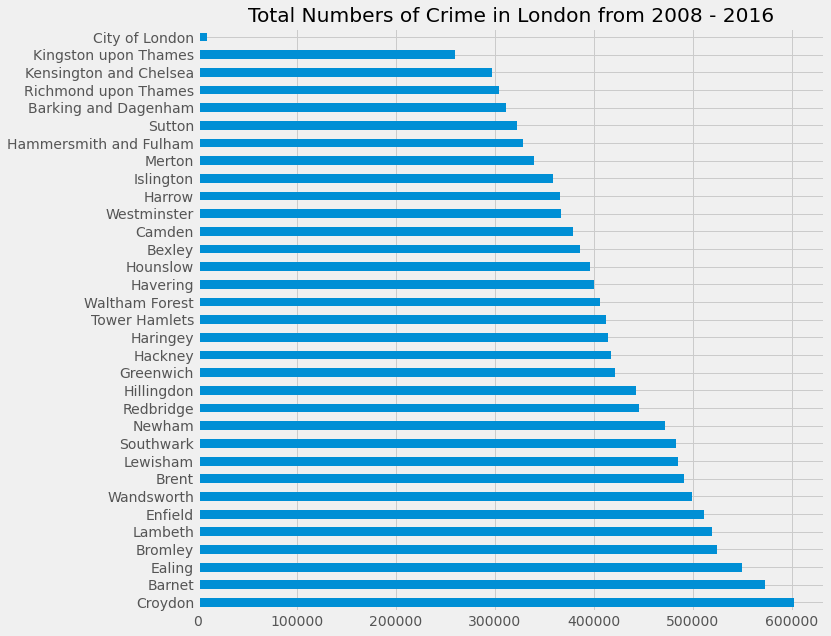

In [210]:
df_london['borough'].value_counts().sort_values(ascending=False).plot(kind='barh', figsize=(10,10))
plt.title("Total Numbers of Crime in London from 2008 - 2016")
plt.ylabel('')
plt.show()

### Jumlah kejahatan untuk wilayah tertentu pada bulan tertentu

In [189]:
borough=df_london.groupby(['borough'])['value'].sum()
borough.sort_values(ascending=True)

borough
City of London               780
Kingston upon Thames       89306
Richmond upon Thames       96771
Sutton                    100987
Bexley                    114136
Merton                    115654
Harrow                    116848
Havering                  138947
Barking and Dagenham      149447
Kensington and Chelsea    171981
Greenwich                 181568
Redbridge                 183562
Bromley                   184349
Hammersmith and Fulham    185259
Hounslow                  186772
Enfield                   193880
Waltham Forest            203879
Wandsworth                204741
Hillingdon                209680
Barnet                    212191
Haringey                  213272
Lewisham                  215137
Hackney                   217119
Brent                     227551
Tower Hamlets             228613
Islington                 230286
Ealing                    251562
Croydon                   260294
Newham                    262024
Camden                    275147
So

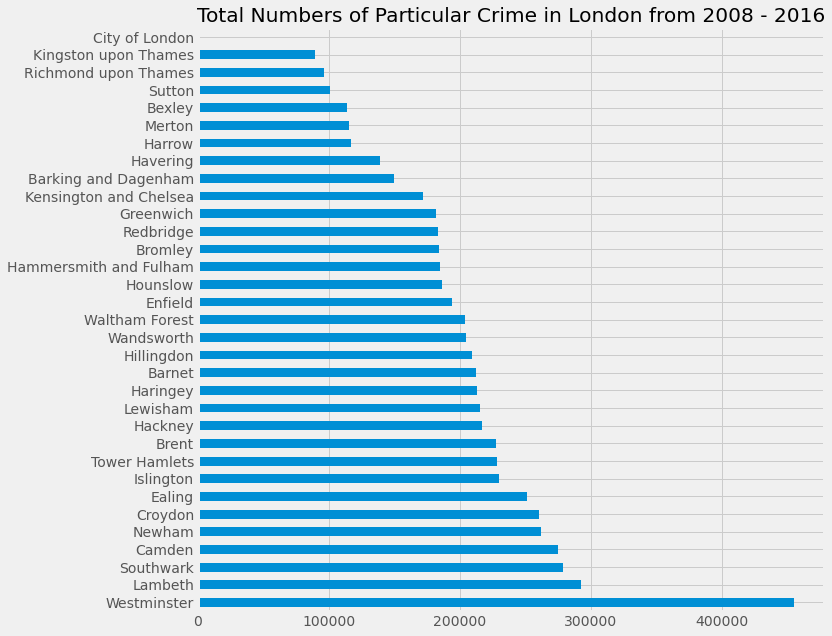

In [213]:
borough.sort_values(ascending=False).plot(kind='barh', figsize=(10, 10))
plt.title("Total Numbers of Particular Crime in London from 2008 - 2016")
plt.ylabel('')
plt.show()

### Menggunakan wilayah City of London sebagai data

In [8]:
col= folium.Map(location=(51.5123443, -0.0909852), zoom_start=13)
col

#### Jumlah kejahatan yang terjadi di wilayah City of London selama tahun 2008 - 2016

In [111]:
df_london[df_london.borough=='City of London']

,borough,major_category,minor_category,value,year,month
1307,City of London,Burglary,Burglary in Other Buildings,0,2012,7
1695,City of London,Robbery,Personal Property,0,2014,3
4109,City of London,Drugs,Drug Trafficking,0,2016,11
4186,City of London,Violence Against the Person,Harassment,0,2008,8
4263,City of London,Burglary,Burglary in Other Buildings,0,2009,6
...,...,...,...,...,...,...
13482840,City of London,Theft and Handling,Theft/Taking of Pedal Cycle,0,2009,12
13483047,City of London,Drugs,Possession Of Drugs,0,2016,9
13487511,City of London,Theft and Handling,Theft/Taking Of Motor Vehicle,0,2008,10
13488364,City of London,Violence Against the Person,Common Assault,0,2013,10


#### Jumlah kejahatan di wilayah City of London selama tahun 2015

In [66]:
col15=df_london.loc[(df_london['borough'].isin(['City of London'])) & (df_london['year']==2015)]
col15

,borough,major_category,minor_category,value,year,month
29291,City of London,Theft and Handling,Other Theft Person,1,2015,5
35083,City of London,Robbery,Business Property,0,2015,11
38031,City of London,Burglary,Burglary in Other Buildings,0,2015,1
61661,City of London,Violence Against the Person,Wounding/GBH,0,2015,3
71974,City of London,Drugs,Possession Of Drugs,0,2015,12
...,...,...,...,...,...,...
13428724,City of London,Violence Against the Person,Common Assault,0,2015,3
13449967,City of London,Violence Against the Person,Other violence,0,2015,3
13451334,City of London,Theft and Handling,Theft/Taking Of Motor Vehicle,0,2015,12
13463578,City of London,Drugs,Possession Of Drugs,0,2015,11


In [53]:
col15_1=df_london.loc[(df_london['borough'].isin(['City of London'])) & (df_london['year']==2015) & (df_london['value']==1)]
col15_1

,borough,major_category,minor_category,value,year,month
29291,City of London,Theft and Handling,Other Theft Person,1,2015,5
74471,City of London,Theft and Handling,Other Theft Person,1,2015,6
137365,City of London,Drugs,Possession Of Drugs,1,2015,4
210293,City of London,Robbery,Personal Property,1,2015,5
680605,City of London,Theft and Handling,Other Theft Person,1,2015,4
...,...,...,...,...,...,...
13010717,City of London,Violence Against the Person,Wounding/GBH,1,2015,1
13039960,City of London,Theft and Handling,Other Theft Person,1,2015,7
13054521,City of London,Violence Against the Person,Common Assault,1,2015,6
13191415,City of London,Violence Against the Person,Wounding/GBH,1,2015,7


In [58]:
col15_2=df_london[((df_london['year'] == 2015) & (df_london['borough'] == 'City of London'))].groupby(['month'])['value'].sum()
col15_2

month
1      9
2      9
3     10
4     15
5     20
6     13
7     16
8     16
9     16
10     9
11    11
12     7
Name: value, dtype: int64

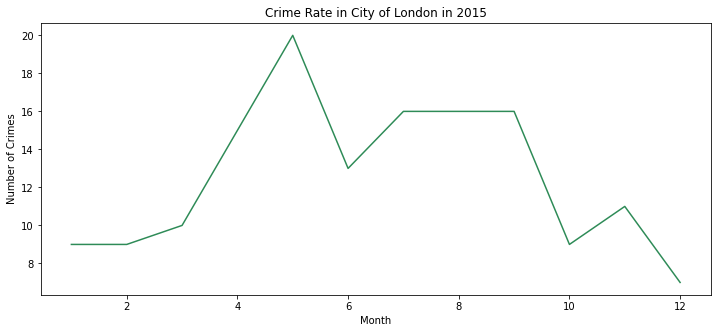

In [59]:
col15_2.plot(kind='line', figsize=(12, 5), color='seagreen')
plt.title('Crime Rate in City of London in 2015')
plt.ylabel('Number of Crimes')
plt.xlabel('Month')
plt.show()

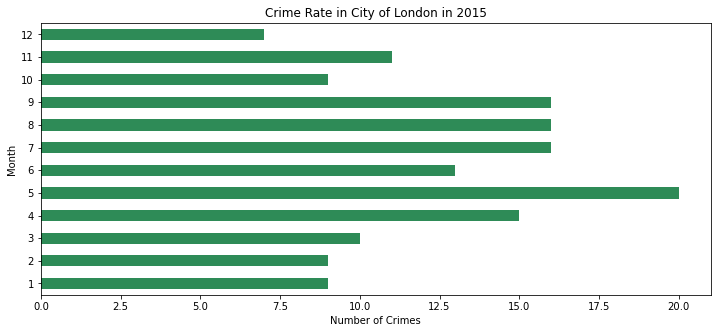

In [62]:
col15_2.plot(kind='barh', figsize=(12, 5), color='seagreen')
plt.title('Crime Rate in City of London in 2015')
plt.ylabel('Month')
plt.xlabel('Number of Crimes')
plt.show()

#### Dari data di atas maka dapat ditarik kesimpulan, pada tahun 2015 kejahatan paling banyak terjadi di bulan Mei.

#### 

### Mengurutkan jenis kejahatan major_category yang terjadi di City of London

In [99]:
col_mjr=df_london[df_london.borough == 'City of London']['major_category'].value_counts()
col_mjr

Theft and Handling             3564
Violence Against the Person    2700
Criminal Damage                1188
Drugs                           756
Robbery                         540
Burglary                        540
Other Notifiable Offences       432
Name: major_category, dtype: int64

### Persentase jenis kejahatan major_category di wilayah City of London selama 2008-2016

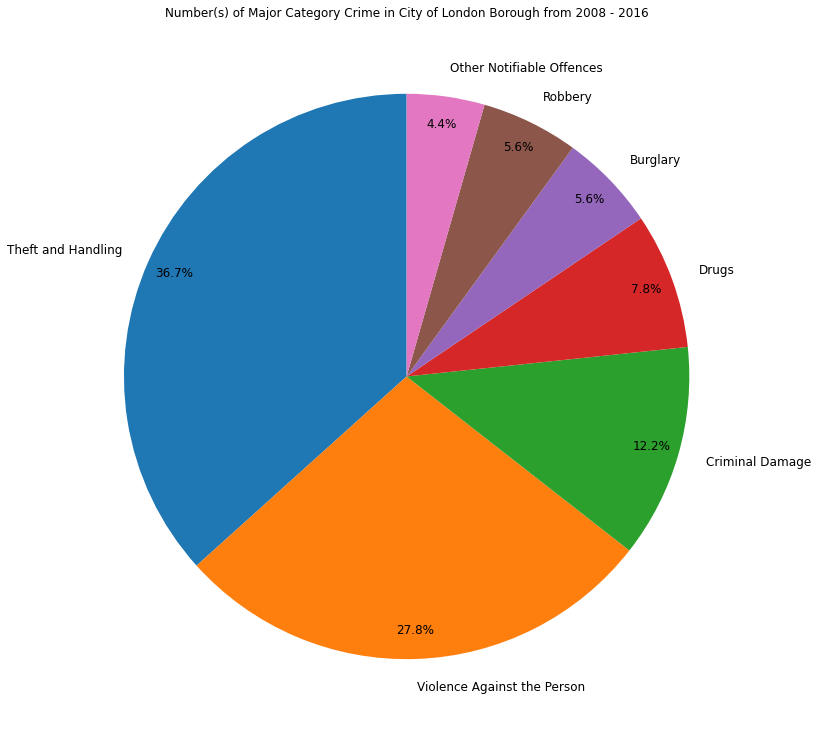

In [16]:
df_col_crm_mjr=df_london[(df_london.borough=='City of London')]['major_category'].value_counts()
df_col_crm_mjr.plot(kind='pie', fontsize=12, figsize=(13, 13), autopct='%1.1f%%', startangle=90, pctdistance=0.9)

plt.title("Number(s) of Major Category Crime in City of London Borough from 2008 - 2016")
plt.ylabel('')
plt.show()

### Mengurutkan jenis kejahatan minor_category yang terjadi di City of London

In [111]:
df_london [df_london.borough == 'City of London']['minor_category'].value_counts()

Common Assault                       648
Other Theft Person                   648
Other Theft                          648
Theft From Motor Vehicle             648
Wounding/GBH                         540
Theft/Taking Of Motor Vehicle        540
Theft/Taking of Pedal Cycle          540
Burglary in Other Buildings          540
Harassment                           540
Other Notifiable                     432
Criminal Damage To Motor Vehicle     432
Other violence                       432
Personal Property                    432
Possession Of Drugs                  432
Other Criminal Damage                432
Theft From Shops                     432
Drug Trafficking                     324
Assault with Injury                  324
Criminal Damage To Other Building    324
Offensive Weapon                     216
Business Property                    108
Handling Stolen Goods                108
Name: minor_category, dtype: int64

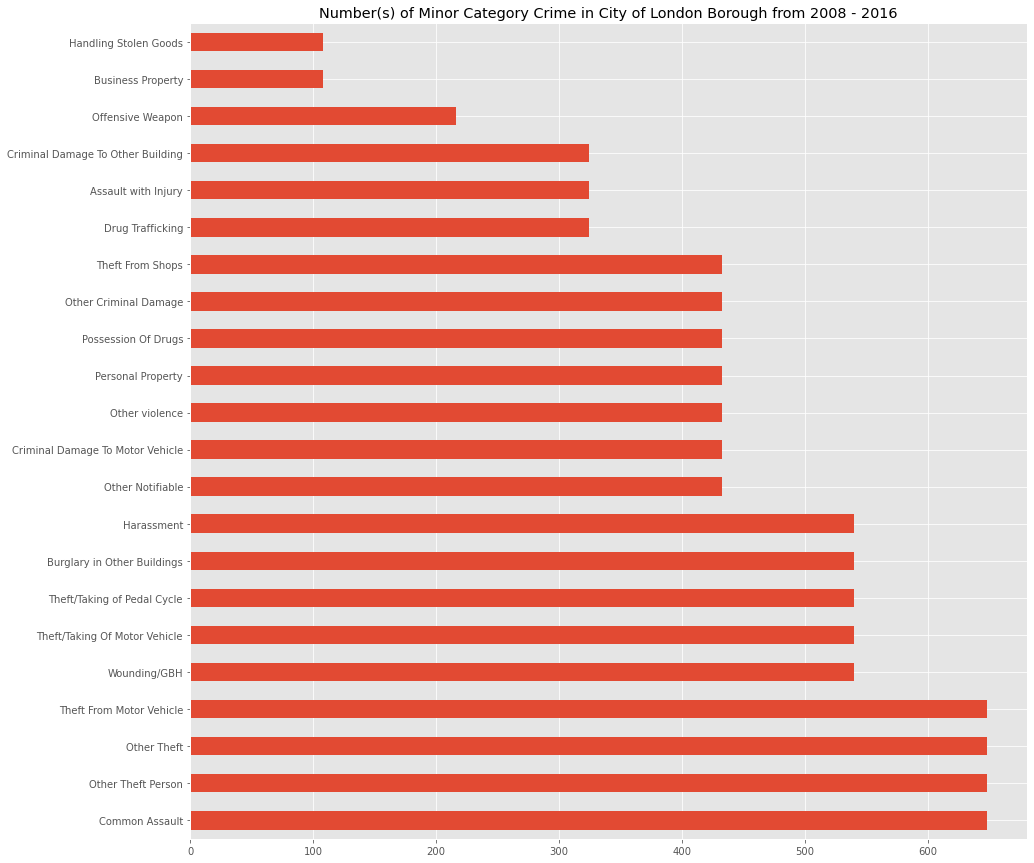

In [55]:
df_col_crm_mnr=df_london[(df_london.borough=='City of London')]['minor_category'].value_counts()
df_col_crm_mnr.plot(kind='barh', figsize=(15, 15))

plt.title("Number(s) of Minor Category Crime in City of London Borough from 2008 - 2016")
plt.ylabel('')
plt.show()

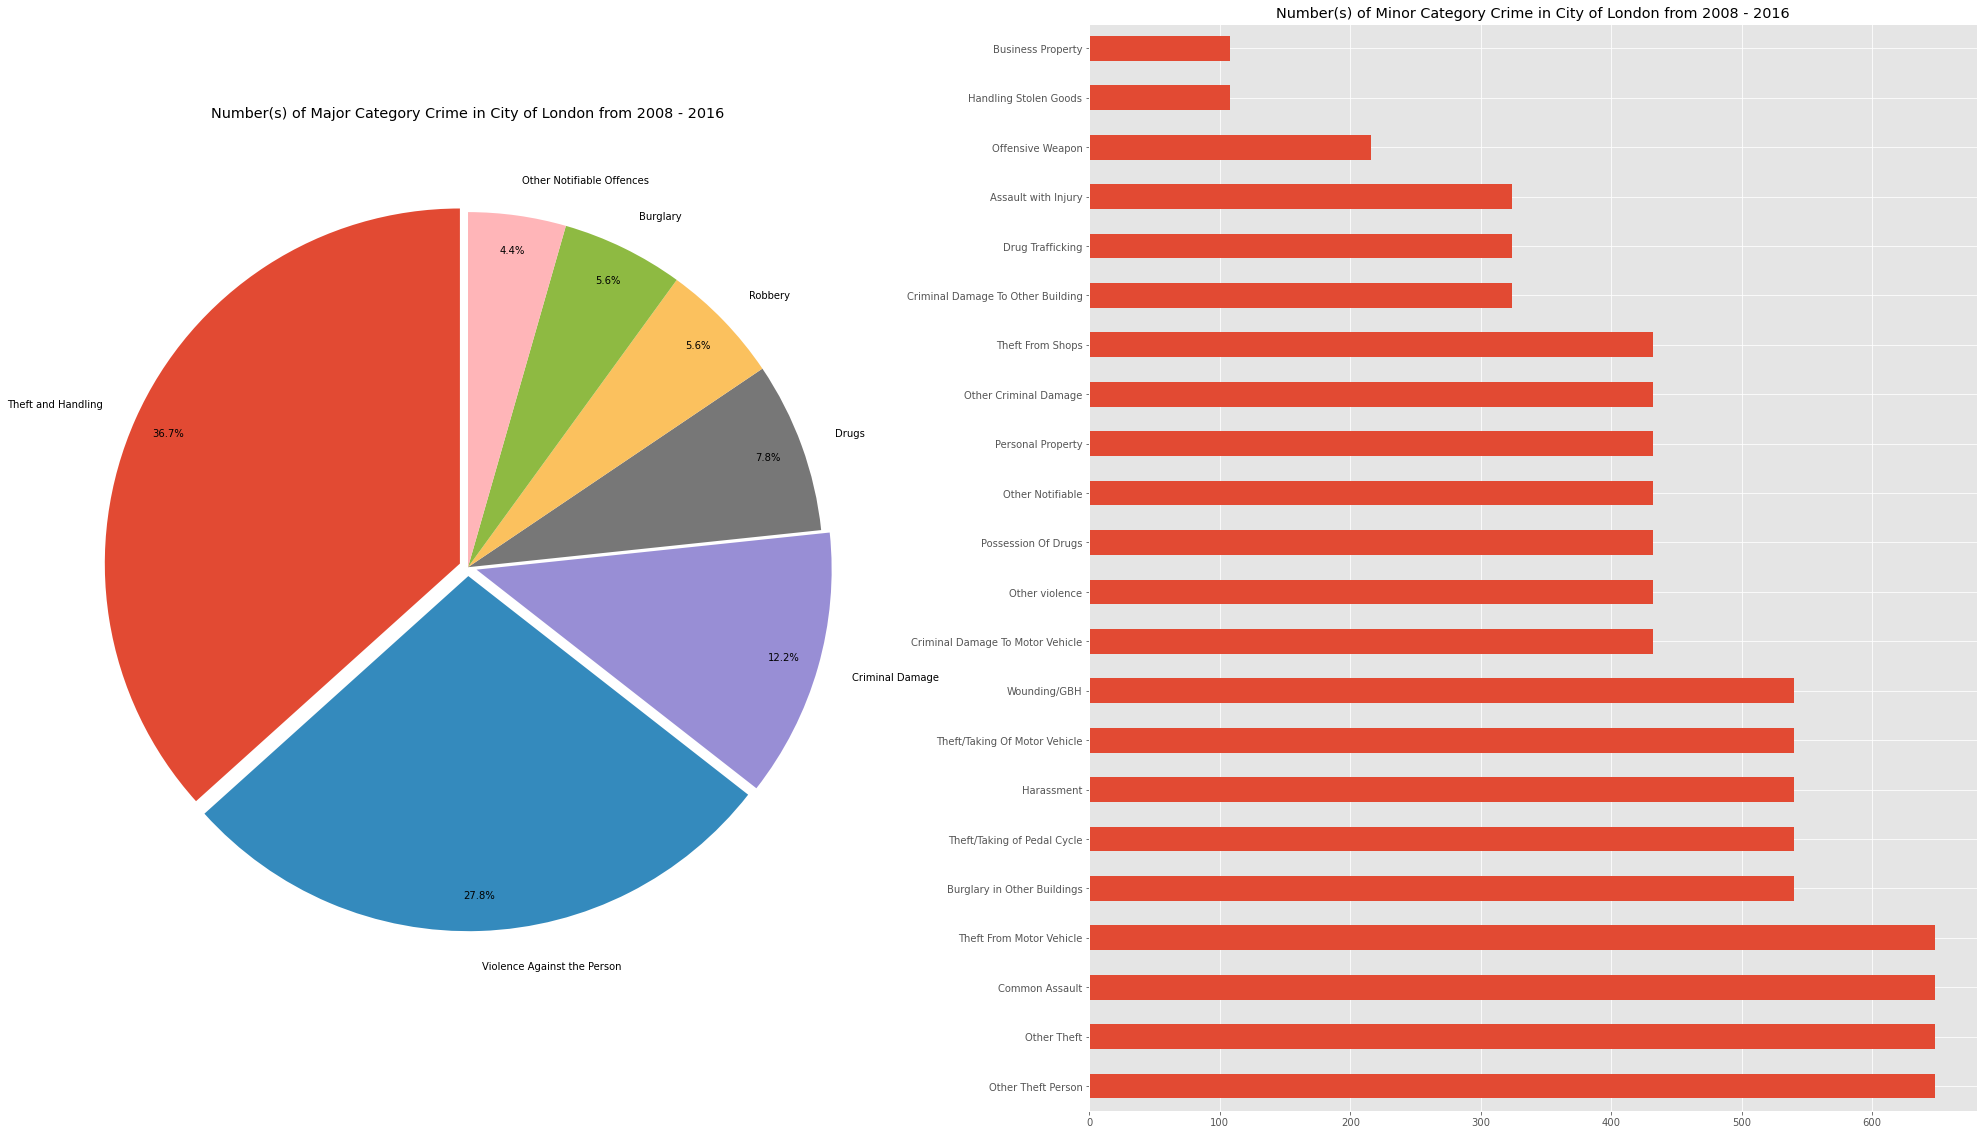

In [227]:
fig=plt.figure(figsize=(35, 20))
ax1=fig.add_subplot(1, 2, 1)
ax2=fig.add_subplot(1, 2, 2)

df_col_crm_mjr.plot(kind='pie',
                    autopct='%1.1f%%',
                    startangle=90,
                    pctdistance=0.9,
                    explode=[0.025, 0.025, 0.025, 0, 0, 0, 0],
                    ax=ax1)
ax1.set_title('Number(s) of Major Category Crime in City of London from 2008 - 2016')
ax1.set_ylabel('')

df_col_crm_mnr.plot(kind='barh', ax=ax2)
ax2.set_title('Number(s) of Minor Category Crime in City of London from 2008 - 2016')

plt.show()

#### Mencari jenis minor_category dalam major_category Theft and Handling di wilayah City of London

In [29]:
df_col_thf=df_london[(df_london.borough=='City of London')&(df_london.major_category=='Theft and Handling')]['minor_category'].value_counts()
df_col_thf

Other Theft                      648
Other Theft Person               648
Theft From Motor Vehicle         648
Theft/Taking of Pedal Cycle      540
Theft/Taking Of Motor Vehicle    540
Theft From Shops                 432
Handling Stolen Goods            108
Name: minor_category, dtype: int64

#### Persentase kejahatan Theft and Handling di wilayah City of London selama 2008-2016

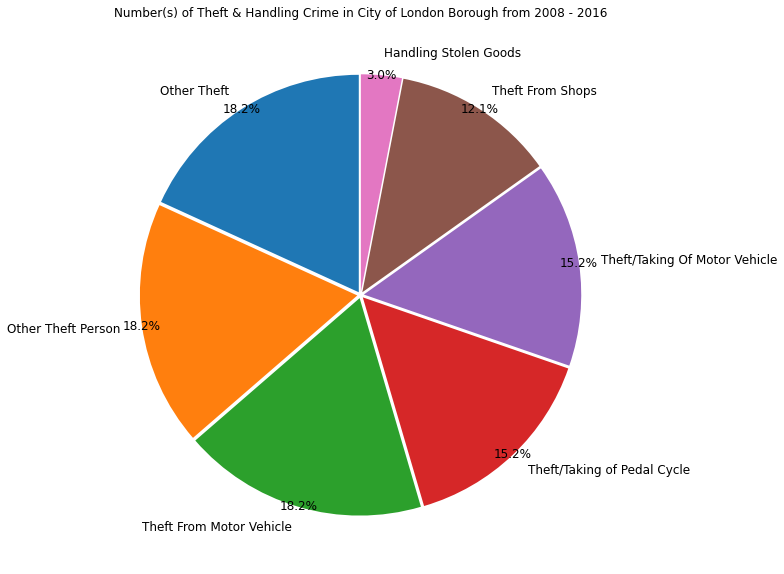

In [30]:
df_col_thf.plot(kind='pie',
                fontsize=12,
                figsize=(15, 10),
                autopct='%1.1f%%',
                startangle=90,
                pctdistance=1,
                explode=[0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015])
plt.title("Number(s) of Theft & Handling Crime in City of London Borough from 2008 - 2016")
plt.ylabel('')
plt.show()

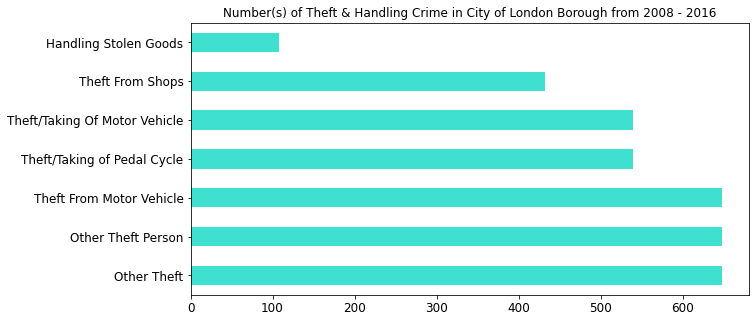

In [46]:
df_col_thf.plot(kind='barh', fontsize=12, figsize=(10, 5), color='turquoise')
plt.title("Number(s) of Theft & Handling Crime in City of London Borough from 2008 - 2016")
plt.ylabel('')
plt.show()

#### Mencari jenis minor_category dalam major_category Violence Against the Person di wilayah City of London

In [47]:
df_col_vio=df_london[(df_london.borough=='City of London')&(df_london.major_category=='Violence Against the Person')]['minor_category'].value_counts()
df_col_vio

Common Assault         648
Harassment             540
Wounding/GBH           540
Other violence         432
Assault with Injury    324
Offensive Weapon       216
Name: minor_category, dtype: int64

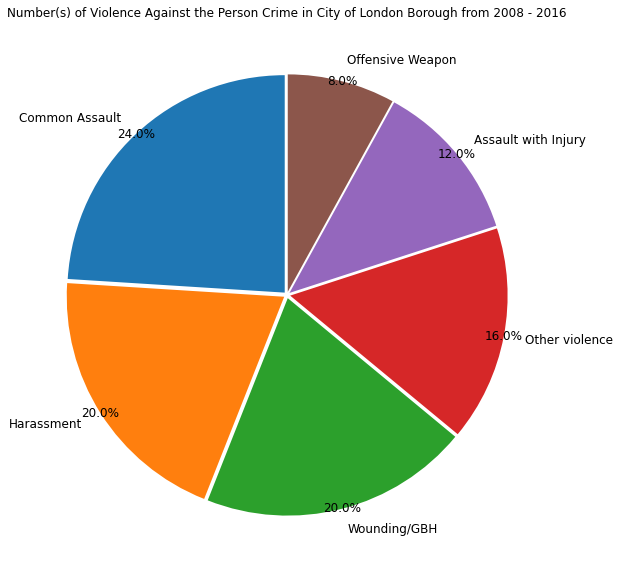

In [48]:
df_col_vio.plot(kind='pie',
                fontsize=12,
                figsize=(15, 10),
                autopct='%1.1f%%',
                startangle=90,
                pctdistance=1,
                explode=[0.015, 0.015, 0.015, 0.015, 0.015, 0.015])
plt.title("Number(s) of Violence Against the Person Crime in City of London Borough from 2008 - 2016")
plt.ylabel('')
plt.show()

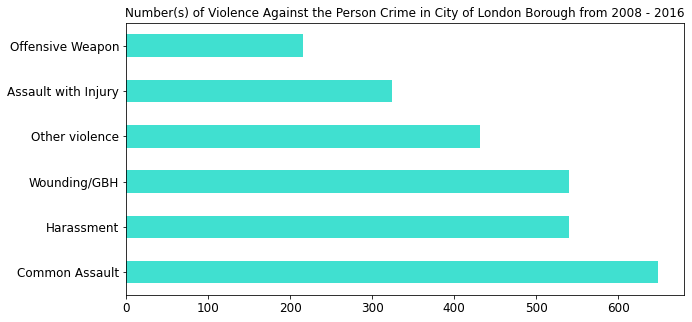

In [50]:
df_col_vio.plot(kind='barh', fontsize=12, figsize=(10, 5), color='turquoise')
plt.title("Number(s) of Violence Against the Person Crime in City of London Borough from 2008 - 2016")
plt.ylabel('')
plt.show()

#### Mencari jenis minor_category dalam major_category Criminal Damage di wilayah City of London

In [17]:
df_col_cmd=df_london[(df_london.borough=='City of London')&(df_london.major_category=='Criminal Damage')]['minor_category'].value_counts()
df_col_cmd

Criminal Damage To Motor Vehicle     432
Other Criminal Damage                432
Criminal Damage To Other Building    324
Name: minor_category, dtype: int64

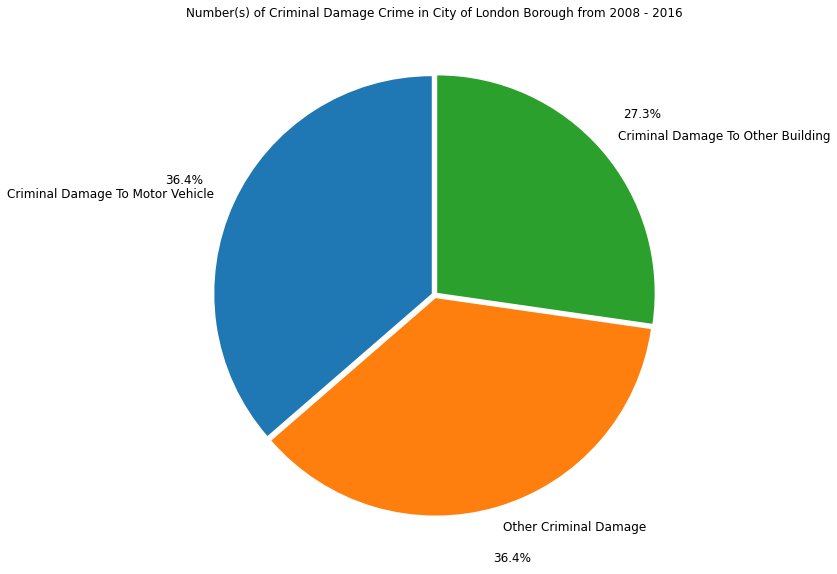

In [27]:
df_col_cmd.plot(kind='pie',
                fontsize=12,
                figsize=(15, 10),
                autopct='%1.1f%%',
                startangle=90,
                pctdistance=1.25,
                explode=[0.015, 0.015, 0.015])
plt.title("Number(s) of Criminal Damage Crime in City of London Borough from 2008 - 2016")
plt.ylabel('')
plt.show()

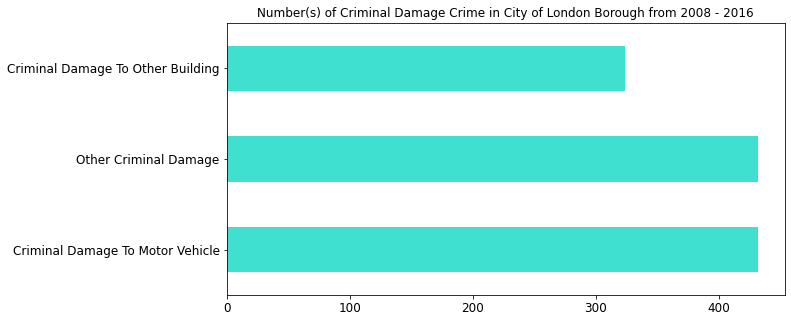

In [51]:
df_col_cmd.plot(kind='barh', fontsize=12, figsize=(10, 5), color='turquoise')
plt.title("Number(s) of Criminal Damage Crime in City of London Borough from 2008 - 2016")
plt.ylabel('')
plt.show()

#### Mencari jenis minor_category dalam major_category Drugs di wilayah City of London

In [31]:
df_col_drg=df_london[(df_london.borough=='City of London')&(df_london.major_category=='Drugs')]['minor_category'].value_counts()
df_col_drg
#Jika dilihat dari data major_category Drugs di wilayah City of London, maka data yang dihasilkan oleh perintah diatas sudah sesuai.

Possession Of Drugs    432
Drug Trafficking       324
Name: minor_category, dtype: int64

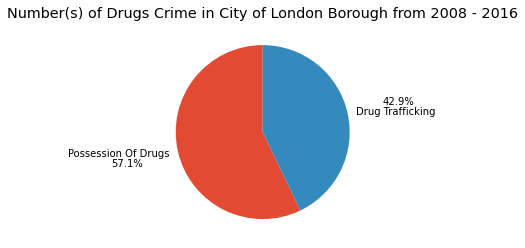

In [135]:
df_col_drg.plot(kind='pie', autopct='%1.1f%%', startangle=90, pctdistance=1.6, fontsize=10)
plt.title("Number(s) of Drugs Crime in City of London Borough from 2008 - 2016")
plt.ylabel('')
plt.show()

## WordCloud

In [152]:
ldn_boro=pd.DataFrame(df_london.groupby(['borough'])['value'].sum())
ldn_boro.sort_values(by='value', ascending=True)
ldn_boro.head(10)

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349
Camden,275147
City of London,780
Croydon,260294
Ealing,251562


In [153]:
ttl_crime=ldn_boro['value'].sum()
ttl_crime

6447758

In [165]:
max_words = 100
text =''
for borough in ldn_boro.index.values:
    if len(borough.split()) ==1:
        repeat_num_times = int(ldn_boro.loc[borough, 'value'] / float(ttl_crime) * max_words)
        text = text + ((borough + ' ')* repeat_num_times)
        
text

'Barnet Barnet Barnet Bexley Brent Brent Brent Bromley Bromley Camden Camden Camden Camden Croydon Croydon Croydon Croydon Ealing Ealing Ealing Enfield Enfield Enfield Greenwich Greenwich Hackney Hackney Hackney Haringey Haringey Haringey Harrow Havering Havering Hillingdon Hillingdon Hillingdon Hounslow Hounslow Islington Islington Islington Lambeth Lambeth Lambeth Lambeth Lewisham Lewisham Lewisham Merton Newham Newham Newham Newham Redbridge Redbridge Southwark Southwark Southwark Southwark Sutton Wandsworth Wandsworth Wandsworth Westminster Westminster Westminster Westminster Westminster Westminster Westminster '

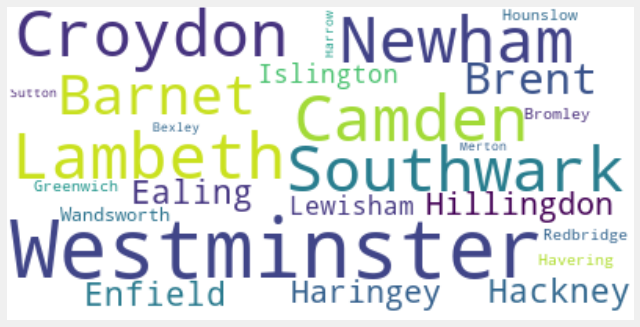

In [179]:
ttl_wc=wordcloud.WordCloud(background_color='white').generate(text)
plt.figure(figsize=(10,10))
plt.imshow(ttl_wc, interpolation='bilinear')
plt.axis('off')
plt.show()